In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn import metrics 
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn import svm
from sklearn.datasets import make_classification
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier

In [7]:
#loading the dataset
original_data = pd.read_csv("bank-full.csv", sep=";")
original_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
                               ####### Statistical Exploration ########

In [4]:
original_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
y            45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [5]:
original_data.describe()
# We observe some extreme maximum values and high standard deviation values
# which will be further investigated

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [6]:
#Check for duplicates
original_data.duplicated().sum()

0

In [7]:
#check for missing values
print(original_data.isnull().sum())

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


In [8]:
# Looking through the data points alternativelly marked as missing values
print('\nJobs: ', original_data.job.unique())
print('\nMarital status: ', original_data.marital.unique())
print('\nEducation: ', original_data.education.unique())
print('\nCredit in default: ', original_data.default.unique())
print('\nHousing loan: ', original_data.housing.unique())
print('\nPersonal loan: ', original_data.loan.unique())
print('\nContact channel: ', original_data.contact.unique())
print('\nMonth: ', original_data.month.unique())
print('\nPrevious campaign outcome: ', original_data.poutcome.unique())


Jobs:  ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']

Marital status:  ['married' 'single' 'divorced']

Education:  ['tertiary' 'secondary' 'unknown' 'primary']

Credit in default:  ['no' 'yes']

Housing loan:  ['yes' 'no']

Personal loan:  ['no' 'yes']

Contact channel:  ['unknown' 'cellular' 'telephone']

Month:  ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']

Previous campaign outcome:  ['unknown' 'failure' 'other' 'success']


In [9]:
# Potential missing values
print('\nUnknown values in job: ', (original_data.job == 'unknown').sum())
print('\nUnknown values in education: ', (original_data.education == 'unknown').sum())
print('\nUnknown values in contact: ', (original_data.contact == 'unknown').sum())
print('\nUnknown values in poutcome: ', (original_data.poutcome == 'unknown').sum())


Unknown values in job:  288

Unknown values in education:  1857

Unknown values in contact:  13020

Unknown values in poutcome:  36959


In [10]:
# Dealing with potential missing values
(original_data.pdays == -1).sum()
(original_data.poutcome == 'other').sum()

In [11]:
# Ensuring there no unnatural values
if(original_data.age.any() < 0 or original_data.age.any() > 100):
    print('\nLikely Impossible!')
else:
    print('\nGood data!')
if(original_data.day.any() < 1 or original_data.age.any() > 31):
    print('\nLikely Impossible!')
else:
    print('\nGood data!')
if(original_data.duration.any() <= 0):
    print('\nLikely Impossible!')
else:
    print('\nGood data!')
if(original_data.campaign.any() <= 0):
    print('\nLikely Impossible!')
else:
    print('\nGood data!')
if(original_data.previous.any() <= 0):
    print('\nLikely Impossible!')
else:
    print('\nGood data!')
if(original_data.pdays.any() < 0 and original_data.pdays.any() != -1):
    print('\nLikely Impossible!')
else:
    print('\nGood data!')


Good data!

Good data!

Good data!

Good data!

Good data!

Good data!


In [12]:
                                  ####### Data Visualization ########

Text(0.5, 0, 'Age')

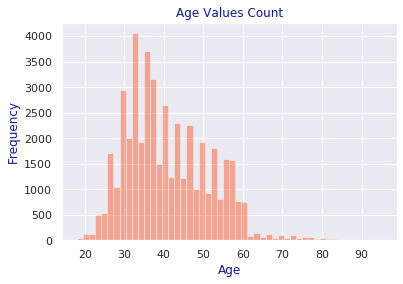

In [9]:
# Count plot of 'age' feature
sns.set(style = 'darkgrid')
ax = sns.distplot(original_data.age, kde = False, color = '#FF3A03')
ax.set_title('Age Values Count', color = '#0E189C')
ax.set_ylabel('Frequency', color= '#0E189C')
ax.set_xlabel('Age', color = '#0E189C')

7168


Text(0.5,0,'Balance($)')

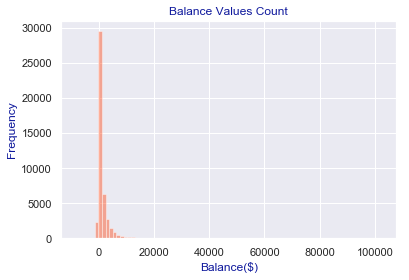

In [14]:
# Count plot of 'balance' feature
# Find how many data points are, to know how many bins to create
balance_array = original_data.balance.unique()
print(len(balance_array))
# Plot histogram
sns.set()
ax1 = sns.distplot(original_data.balance, bins = 84, kde = False, color = '#FF3A03')
ax1.set_title('Balance Values Count', color = '#0E189C')
ax1.set_ylabel('Frequency', color = '#0E189C')
ax1.set_xlabel('Balance($)', color = '#0E189C')

6988


Text(0.5,0,'Balance($)')

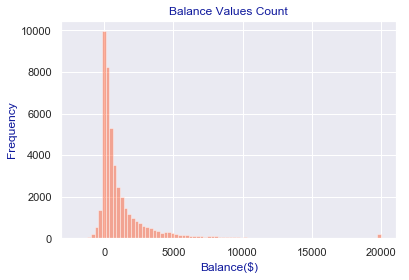

In [15]:
# Outliers in balance
copy_2 = original_data
copy_1 = copy_2
copy_1.balance = copy_1.balance.where(copy_1.balance < 20000, other = 20000)
copy_1.balance = copy_1.balance.where(copy_1.balance > -2000, other = -2000)
balance_array = copy_1.balance.unique()
print(len(balance_array))
sns.set()
ax = sns.distplot(copy_1.balance, bins = 84, kde = False, color = '#FF3A03')
ax.set_title('Balance Values Count', color = '#0E189C')
ax.set_ylabel('Frequency', color = '#0E189C')
ax.set_xlabel('Balance($)', color = '#0E189C')

Text(0.5,0,'Balance($)')

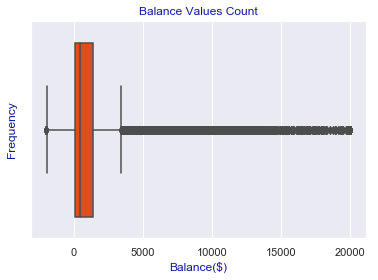

In [16]:
sns.set()
ax = sns.boxplot(copy_1.balance, color = '#FF3A03')
ax.set_title('Balance Values Count', color = '#0E189C')
ax.set_ylabel('Frequency', color = '#0E189C')
ax.set_xlabel('Balance($)', color = '#0E189C')

1573


Text(0.5,0,'Duration(s)')

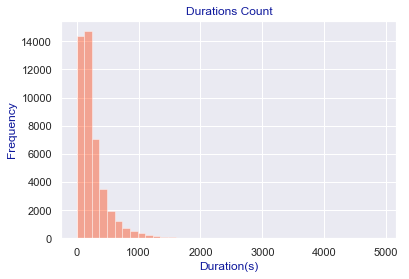

In [17]:
# Count plot of 'duration' feature
# Find how many data points are, to know how many bins to create
duration_array = original_data.duration.unique()
print(len(duration_array))
# Plot histogram
sns.set(style = 'darkgrid')
ax = sns.distplot(original_data.duration, bins = 40, kde = False, color = '#FF3A03')
ax.set_title('Durations Count', color = '#0E189C')
ax.set_ylabel('Frequency', color= '#0E189C')
ax.set_xlabel('Duration(s)', color = '#0E189C')

1517


Text(0.5,0,'Duration(s)')

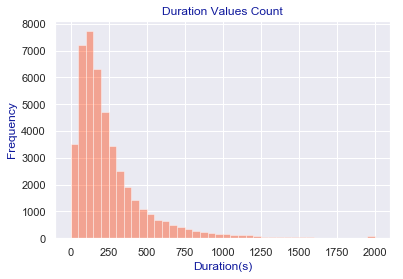

In [18]:
# Outliers in duration
copy_2 = original_data
copy_1 = copy_2
copy_1.duration = copy_1.duration.where(copy_1.duration < 2000, other = 2000)
balance_array = copy_1.duration.unique()
print(len(balance_array))
sns.set()
ax = sns.distplot(copy_1.duration, bins = 40, kde = False, color = '#FF3A03')
ax.set_title('Duration Values Count', color = '#0E189C')
ax.set_ylabel('Frequency', color = '#0E189C')
ax.set_xlabel('Duration(s)', color = '#0E189C')

Text(0.5,0,'Duration(s)')

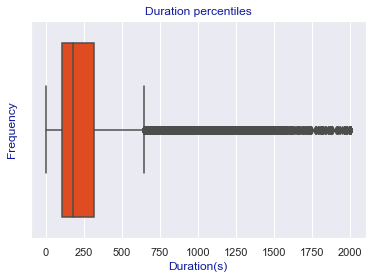

In [19]:
sns.set()
ax = sns.boxplot(copy_1.duration, color = '#FF3A03')
ax.set_title('Duration percentiles', color = '#0E189C')
ax.set_ylabel('Frequency', color = '#0E189C')
ax.set_xlabel('Duration(s)', color = '#0E189C')

Text(0.5,0,'campaign')

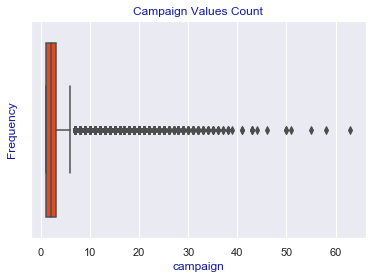

In [20]:
sns.set()
ax = sns.boxplot(copy_1.campaign, color = '#FF3A03')
ax.set_title('Campaign Values Count', color = '#0E189C')
ax.set_ylabel('Frequency', color = '#0E189C')
ax.set_xlabel('campaign', color = '#0E189C')

Text(0.5,0,'Previous')

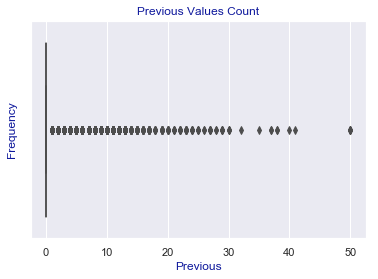

In [21]:
copy_1.previous = copy_1.previous.where(copy_1.previous < 50, other = 50)
sns.set()
ax = sns.boxplot(copy_1.previous, color = '#FF3A03')
ax.set_title('Previous Values Count', color = '#0E189C')
ax.set_ylabel('Frequency', color = '#0E189C')
ax.set_xlabel('Previous', color = '#0E189C')

Text(0.5,0,'Pdays')

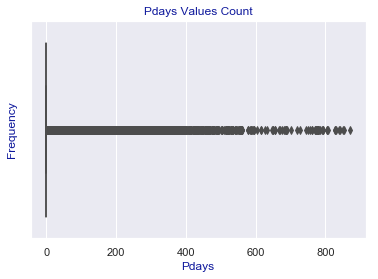

In [22]:
sns.set()
ax = sns.boxplot(copy_1.pdays, color = '#FF3A03')
ax.set_title('Pdays Values Count', color = '#0E189C')
ax.set_ylabel('Frequency', color = '#0E189C')
ax.set_xlabel('Pdays', color = '#0E189C')

In [23]:
# we plot the scatter matrix plot to find relation 
#pd.plotting.scatter_matrix(original_data)


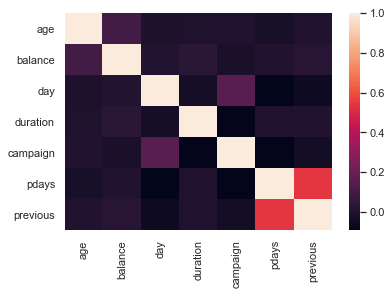

In [24]:
#splt.matshow(original_data.corr(method ='pearson'))
corr =original_data.corr(method = 'pearson')
sns.heatmap(corr)

In [ ]:


pie_array = np.zeros(4, dtype = int)
pie_array[0] = sum(original_data.poutcome == 'unknown')
pie_array[1] = sum(original_data.poutcome == 'other')
pie_array[2] = sum(original_data.poutcome == 'success')
pie_array[3] = sum(original_data.poutcome == 'failure')
print(pie_array[::])
splt.pie(pie_array, radius = 2, labels = ['unknown', 'other', 'success', 'failure'], explode = [0.1, 0.1, 0.1, 0.1])


# In[24]:


pie_array = np.zeros(4, dtype = int)
pie_array[0] = sum(original_data.education == 'unknown')
pie_array[1] = sum(original_data.education == 'primary')
pie_array[2] = sum(original_data.education == 'secondary')
pie_array[3] = sum(original_data.education == 'tertiary')
print(pie_array[::])
splt.pie(pie_array, radius = 2, labels = ['unknown', 'primary', 'secondary', 'tertiary'], explode = [0.05, 0.05, 0.05, 0.05])
splt.title('Education repartition')


# In[25]:


sns.set()
splt.figure(figsize = [14,8])
ax = sns.violinplot(y=original_data.balance, x=original_data.job, saturation = 1)



In [25]:
#data transformation. From categorical to numerical value
original_data = pd.read_csv("bank-full.csv", sep=";")

le = preprocessing.LabelEncoder()
le.fit(original_data['job'])
original_data['job'] = (le.transform(original_data['job']))
x = [x for x in range(len(set(original_data['job'])))]
print(x,le.inverse_transform(x) )

le.fit(original_data['marital'])
original_data['marital'] = (le.transform(original_data['marital']))

le.fit(original_data['education'])
original_data['education'] = (le.transform(original_data['education']))

le.fit(original_data['default'])
original_data['default'] = (le.transform(original_data['default']))

le.fit(original_data['housing'])
original_data['housing'] = (le.transform(original_data['housing']))

le.fit(original_data['loan'])
original_data['loan'] = (le.transform(original_data['loan']))

le.fit(original_data['contact'])
original_data['contact'] = (le.transform(original_data['contact']))

le.fit(original_data['month'])
original_data['month'] = (le.transform(original_data['month']))

le.fit(original_data['poutcome'])
original_data['poutcome'] = (le.transform(original_data['poutcome']))

le.fit(original_data['y'])
original_data['y'] = (le.transform(original_data['y']))



[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11] ['admin.' 'blue-collar' 'entrepreneur' 'housemaid' 'management' 'retired'
 'self-employed' 'services' 'student' 'technician' 'unemployed' 'unknown']


In [26]:
###data mining and descriptive

print(original_data.head(),"\n",  original_data.describe())

### we want to know the repartition of the class
print(original_data.y.value_counts())

print("proportion of classes:\n", original_data.y.value_counts()/len(original_data.y))

#### here we need to plot histogram to see if there are clear boundaries to choose variable
### We need to find if there are outliers too

   age  job  marital  education  default  balance  housing  loan  contact  \
0   58    4        1          2        0     2143        1     0        2   
1   44    9        2          1        0       29        1     0        2   
2   33    2        1          1        0        2        1     1        2   
3   47    1        1          3        0     1506        1     0        2   
4   33   11        2          3        0        1        0     0        2   

   day  month  duration  campaign  pdays  previous  poutcome  y  
0    5      8       261         1     -1         0         3  0  
1    5      8       151         1     -1         0         3  0  
2    5      8        76         1     -1         0         3  0  
3    5      8        92         1     -1         0         3  0  
4    5      8       198         1     -1         0         3  0   
                 age           job       marital     education       default  \
count  45211.000000  45211.000000  45211.000000  45211.00000

In [27]:
x = original_data.iloc[:,:-1]
y = original_data.iloc[:,-1]
print(x.head(),"\n" ,y.head())



   age  job  marital  education  default  balance  housing  loan  contact  \
0   58    4        1          2        0     2143        1     0        2   
1   44    9        2          1        0       29        1     0        2   
2   33    2        1          1        0        2        1     1        2   
3   47    1        1          3        0     1506        1     0        2   
4   33   11        2          3        0        1        0     0        2   

   day  month  duration  campaign  pdays  previous  poutcome  
0    5      8       261         1     -1         0         3  
1    5      8       151         1     -1         0         3  
2    5      8        76         1     -1         0         3  
3    5      8        92         1     -1         0         3  
4    5      8       198         1     -1         0         3   
 0    0
1    0
2    0
3    0
4    0
Name: y, dtype: int32


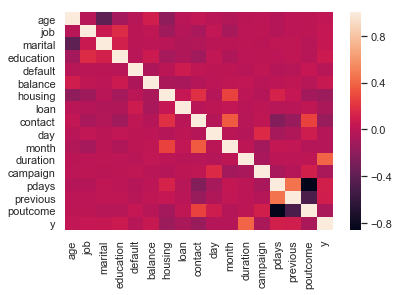

In [28]:
corr =original_data.corr(method = 'pearson')
sns.heatmap(corr)

In [29]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33)


print("proportion of classes:\n", y_test.value_counts()/len(y_test))
###by spliting randomly we almost have the same proportion of classa 0 and 1

proportion of classes:
 0    0.881434
1    0.118566
Name: y, dtype: float64


In [ ]:
### SANDARDIZE THE DATA ########
#preprocessing.StandardScaler().fit(X_train)
X_train1 = preprocessing.StandardScaler().fit_transform(X_train1)
X_test1 = preprocessing.StandardScaler().fit_transform(X_test1)


# In[35]:


pca = PCA(.95)
pca.fit(X_train1)
X_train1 = pca.transform(X_train1)
X_test1 = pca.transform(X_test1)
pca.n_components_ 


### we start apllying machine learning algorithme and we try to get the best model without overfitting

### the first algoritms are presents here and we will try to improve accuracy

In [30]:
len(X_train)
# Train
clf = DecisionTreeClassifier()
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8703083109919572


In [31]:
#plot_tree(clf.fit(x,y)) 

# this clearly show that we need to focus on the feature selection.

In [32]:
confusion_ma = confusion_matrix(y_test, y_pred)

TP = confusion_ma[1, 1]
TN = confusion_ma[0, 0]
FP = confusion_ma[0, 1]
FN = confusion_ma[1, 0]

#Sensitivity
print('Sensitivity', TP / float(FN + TP))

#Specificity
print('Specificity', TN / (TN + FP))
#########################################!!! LOW SENSITIVITY!!!

Sensitivity 0.4595816845675523
Specificity 0.9255569918637366


In [33]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33)
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8408176943699732


In [34]:
confusion_ma = confusion_matrix(y_test, y_pred)

TP = confusion_ma[1, 1]
TN = confusion_ma[0, 0]
FP = confusion_ma[0, 1]
FN = confusion_ma[1, 0]

#Sensitivity
print('Sensitivity', TP / float(FN + TP))

#Specificity
print('Specificity', TN / (TN + FP))

Sensitivity 0.4583808437856328
Specificity 0.8917666717302142


In [35]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33)
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(X_train, y_train)
y_pred = gnb.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8453083109919571


In [36]:
confusion_ma = confusion_matrix(y_test, y_pred)

TP = confusion_ma[1, 1]
TN = confusion_ma[0, 0]
FP = confusion_ma[0, 1]
FN = confusion_ma[1, 0]

#Sensitivity
print('Sensitivity', TP / float(FN + TP))

#Specificity
print('Specificity', TN / (TN + FP))

Sensitivity 0.4597636465953855
Specificity 0.8974358974358975


In [37]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33)

clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(15,), random_state=1)
clf.fit(X_train,y_train)

y_pred = gnb.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.842627345844504


In [38]:
confusion_ma = confusion_matrix(y_test, y_pred)

TP = confusion_ma[1, 1]
TN = confusion_ma[0, 0]
FP = confusion_ma[0, 1]
FN = confusion_ma[1, 0]

#Sensitivity
print('Sensitivity', TP / float(FN + TP))

#Specificity
print('Specificity', TN / (TN + FP))

Sensitivity 0.4464186563020544
Specificity 0.8970195899077673


In [221]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33)


clf = svm.SVC()
clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

D:\Langage_Programation\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy: 0.8839812332439678


###  we will go more in detail to have a better model

In [39]:
### Kneighboor classifier

neigh = KNeighborsClassifier(n_neighbors=3, weights='uniform', algorithm='auto', p=2)
neigh.fit(X_train, y_train)

y_predict = neigh.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

for k in range(1,8):
        
    neigh = KNeighborsClassifier(n_neighbors=k, weights='uniform', algorithm='auto', p=2)
    neigh.fit(X_train, y_train)

    y_predict = neigh.predict(X_test)

    print("Accuracy with ",k, "neighbors " ,metrics.accuracy_score(y_test, y_predict))

### there is no need to change the value of k


for k in range(1,8):
        
    neigh = KNeighborsClassifier(n_neighbors=k, weights='distance', algorithm='auto', p=2)
    neigh.fit(X_train, y_train)

    y_predict = neigh.predict(X_test)

    print("Accuracy with ",k, "neighbors and weight distance " ,metrics.accuracy_score(y_test, y_predict))

### there is no need to change the weight.

###The best value is made for 6 neighbors and uniform weigth
confusion_matrix(y_test,y_predict)

Accuracy: 0.842627345844504
Accuracy with  1 neighbors  0.8502680965147453
Accuracy with  2 neighbors  0.8779490616621984
Accuracy with  3 neighbors  0.8729222520107238
Accuracy with  4 neighbors  0.8802278820375335
Accuracy with  5 neighbors  0.87828418230563
Accuracy with  6 neighbors  0.8809651474530831
Accuracy with  7 neighbors  0.8803619302949062
Accuracy with  1 neighbors and weight distance  0.8502680965147453
Accuracy with  2 neighbors and weight distance  0.8504691689008043
Accuracy with  3 neighbors and weight distance  0.8729892761394102
Accuracy with  4 neighbors and weight distance  0.8729222520107238
Accuracy with  5 neighbors and weight distance  0.8770777479892762
Accuracy with  6 neighbors and weight distance  0.8780831099195711
Accuracy with  7 neighbors and weight distance  0.8806970509383378


array([[12680,   439],
       [ 1341,   460]], dtype=int64)

In [40]:
clf = DecisionTreeClassifier(criterion='gini', splitter='random', min_samples_split=20)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy ",k, " :",metrics.accuracy_score(y_test, y_pred))
confusion_ma = confusion_matrix(y_test, y_pred)

TP = confusion_ma[1, 1]
TN = confusion_ma[0, 0]
FP = confusion_ma[0, 1]
FN = confusion_ma[1, 0]

#Sensitivity
print('Sensitivity', TP / float(FN + TP))

#Specificity
print('Specificity', TN / (TN + FP))
confusion_ma

Accuracy  7  : 0.8906836461126005
Sensitivity 0.410882842865075
Specificity 0.9565515664303682


array([[12549,   570],
       [ 1061,   740]], dtype=int64)

In [41]:
for k in range(1,15):
    rfc = RandomForestClassifier(n_estimators=25+k, criterion='gini')
    rfc.fit(X_train, y_train)
    y_pred = rfc.predict(X_test)
    print("Accuracy ",k, " :",metrics.accuracy_score(y_test, y_pred))
    
    confusion_ma = confusion_matrix(y_test, y_pred)

    TP = confusion_ma[1, 1]
    TN = confusion_ma[0, 0]
    FP = confusion_ma[0, 1]
    FN = confusion_ma[1, 0]

    #Sensitivity
    print('Sensitivity', TP / float(FN + TP))

    #Specificity
    print('Specificity', TN / (TN + FP))


Accuracy  1  : 0.8979892761394102
Sensitivity 0.36590782898389784
Specificity 0.9710343776202455
Accuracy  2  : 0.899396782841823
Sensitivity 0.4031093836757357
Specificity 0.9675280128058541
Accuracy  3  : 0.9004691689008043
Sensitivity 0.38256524153248195
Specificity 0.9715679548746093
Accuracy  4  : 0.9009383378016086
Sensitivity 0.4053303720155469
Specificity 0.9689762939248419
Accuracy  5  : 0.8978552278820375
Sensitivity 0.3786785119378123
Specificity 0.9691287445689458
Accuracy  6  : 0.8986595174262735
Sensitivity 0.4036646307606885
Specificity 0.9666133089412303
Accuracy  7  : 0.900804289544236
Sensitivity 0.38423098278734036
Specificity 0.9717204055187133
Accuracy  8  : 0.9016085790884718
Sensitivity 0.4097723486951694
Specificity 0.9691287445689458
Accuracy  9  : 0.8999329758713137
Sensitivity 0.38256524153248195
Specificity 0.9709581522981935
Accuracy  10  : 0.9013404825737266
Sensitivity 0.40755136035535816
Specificity 0.9691287445689458
Accuracy  11  : 0.9002680965147453
S

In [42]:
### we have to split the data  set into equal class

In [43]:
X_train1= original_data[original_data['y']==1]
X_train0 = original_data[original_data['y']==0].sample(n=len(X_train1), random_state=0)


data = pd.concat([X_train0, X_train1])

x = data.iloc[:,:-1]
y = data.iloc[:,-1]


data.describe()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,10578.000000,10578.000000,10578.000000,10578.000000,10578.000000,10578.000000,10578.000000,10578.000000,10578.000000,10578.000000,10578.000000,10578.000000,10578.000000,10578.000000,10578.000000,10578.000000,10578.000000
mean,41.316884,4.502269,1.197580,1.284836,0.013330,1530.914067,0.473435,0.130459,0.485631,15.539894,5.467952,379.122802,2.508130,52.548780,0.854509,2.464360,0.500000
std,11.989555,3.258206,0.628125,0.745145,0.114687,3218.291508,0.499317,0.336824,0.817248,8.389991,3.194990,349.839787,2.731116,108.804806,2.287155,1.011939,0.500024
min,18.000000,0.000000,0.000000,0.000000,0.000000,-3372.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,-1.000000,0.000000,0.000000,0.000000
25%,32.000000,1.000000,1.000000,1.000000,0.000000,117.000000,0.000000,0.000000,0.000000,8.000000,3.000000,144.000000,1.000000,-1.000000,0.000000,2.000000,0.000000
50%,39.000000,4.000000,1.000000,1.000000,0.000000,547.000000,0.000000,0.000000,0.000000,15.000000,6.000000,260.000000,2.000000,-1.000000,0.000000,3.000000,0.500000
75%,49.000000,7.000000,2.000000,2.000000,0.000000,1718.000000,1.000000,0.000000,1.000000,21.000000,8.000000,506.000000,3.000000,66.000000,1.000000,3.000000,1.000000
max,95.000000,11.000000,2.000000,3.000000,1.000000,81204.000000,1.000000,1.000000,2.000000,31.000000,11.000000,3881.000000,44.000000,854.000000,58.000000,3.000000,1.000000


In [44]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(x, y, test_size=0.33)


In [45]:
### Kneighboor classifier

neigh = KNeighborsClassifier(n_neighbors=3, weights='uniform', algorithm='auto', p=2)
neigh.fit(X_train1, y_train1)

y_predict1 = neigh.predict(X_test1)
y_predict1.reshape(len(y_predict1),)
y_test.values.reshape(len(y_test),)

print("Accuracy:",metrics.accuracy_score(y_test1, y_predict1))


Accuracy: 0.7378974505872243


In [46]:
print(y_test1.shape)
print(y_predict1.shape)

(3491,)
(3491,)


In [47]:
confusion_ma = confusion_matrix(y_test1, y_predict1)
confusion_ma

array([[1302,  439],
       [ 476, 1274]], dtype=int64)

Accuracy : 0.7966198796906331


'\n\nTP = TP/TP[-1]\nTN = TN/n\nFP= FP/FP[-1]\nFN = FN/n\nsensibility = TP/(TP+FP)\nspecificity = TN/(TN+FN)\nantispecificity = 1 - specificity\n\nplt.figure()\n\nplt.plot(specificity,sensibility)\n\nindice=np.linspace(0,1,20)\n\n\n\n\nprint(indice)\nX=[]\nY=[]\nX.append(0)\nY.append(0)\nfor k in range(0,len(indice)-1):\n    \n    X.append(sensibility[int(indice[k]*n-1)])\n    Y.append(antispecificity[int(indice[k]*n-1)])\n    print(int(indice[k]*n))\n\nprint(sensibility)    \nprint(X)\n\nX.append(1)\nY.append(1)\nplt.figure()\n\nplt.scatter(X,Y)\n'

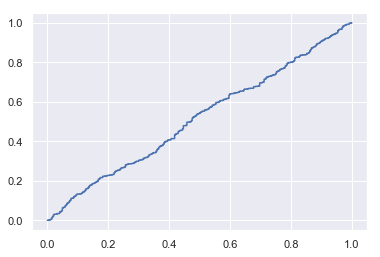

In [250]:
clf = DecisionTreeClassifier(criterion='gini', splitter='random', min_samples_split=20)
clf.fit(X_train1,y_train1)
y_predict1 = clf.predict(X_test1)
print("Accuracy :",metrics.accuracy_score(y_test1, y_predict1))
confusion_matrix(y_test1, y_predict1)

n = len(y_test1)



TP = []
TN = []
FP = []
FN = []

#initialize

if ((y_predict1[0]==0) and (y_test1.iloc[0]==0)):
    TP.append((1))
    TN.append(0)
    FP.append(0)
    FN.append(0)
if ((y_predict1[0]==0) and (y_test1.iloc[0]==1)):
    TP.append(0)
    TN.append(0)
    FP.append(0)
    FN.append(1)
if ((y_predict1[0]==1) and (y_test1.iloc[0]==0)):
    TP.append(0)
    TN.append(0)
    FP.append(1)
    FN.append(0)
if ((y_predict1[0]==1) and (y_test1.iloc[0]==1)):
    TP.append(0)
    TN.append(1)
    FP.append(0)
    FN.append(0)

for k in range(1,n):
    if ((y_predict1[k]==0) and (y_test1.iloc[k]==0)):
        TP.append((TP[k-1]+1))
        TN.append(TN[k-1]+0)
        FP.append(FP[k-1]+0)
        FN.append(FN[k-1]+0)
        
    if ((y_predict1[k]==0) and (y_test1.iloc[k]==1)):
        TP.append((TP[k-1]+0))
        TN.append(TN[k-1]+0)
        FP.append(FP[k-1]+0)
        FN.append(FN[k-1]+1)
    if ((y_predict1[k]==1) and (y_test1.iloc[k]==0)):
        TP.append((TP[k-1]+0))
        TN.append(TN[k-1]+0)
        FP.append(FP[k-1]+1)
        FN.append(FN[k-1]+0)
    if ((y_predict1[k]==1) and (y_test1.iloc[k]==1)):
        TP.append((TP[k-1]+0))
        TN.append(TN[k-1]+1)
        FP.append(FP[k-1]+0)
        FN.append(FN[k-1]+0)
    

    
TP = np.asarray(TP)
TN = np.asarray(TN)
FP = np.asarray(FP)
FN = np.asarray(FN)

TP = TP/TP[-1]
FP= FP/FP[-1]
plt.figure()

plt.plot(FP,TP)







"""

TP = TP/TP[-1]
TN = TN/n
FP= FP/FP[-1]
FN = FN/n
sensibility = TP/(TP+FP)
specificity = TN/(TN+FN)
antispecificity = 1 - specificity

plt.figure()

plt.plot(specificity,sensibility)

indice=np.linspace(0,1,20)




print(indice)
X=[]
Y=[]
X.append(0)
Y.append(0)
for k in range(0,len(indice)-1):
    
    X.append(sensibility[int(indice[k]*n-1)])
    Y.append(antispecificity[int(indice[k]*n-1)])
    print(int(indice[k]*n))

print(sensibility)    
print(X)

X.append(1)
Y.append(1)
plt.figure()

plt.scatter(X,Y)
"""

In [72]:
clf = RandomForestClassifier(max_depth=30, random_state=0)
clf.fit(X_train1,y_train1)
y_predict1=clf.predict(X_test1)
print("Accuracy ",k, " :",metrics.accuracy_score(y_test1, y_predict1))
confusion_matrix(y_test1, y_predict1)


Accuracy  3490  : 0.8352907476367802


D:\Langage_Programation\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


array([[1468,  273],
       [ 302, 1448]], dtype=int64)

In [50]:

clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(80,), random_state=1)
clf.fit(X_train1,y_train1)

y_predict1 = gnb.predict(X_test1)
print("Accuracy:",metrics.accuracy_score(y_test1, y_predict1))

Accuracy: 0.6786021197364652


In [51]:


clf = svm.SVC()
clf.fit(X_train1,y_train1)

y_predict1 = clf.predict(X_test1)
print("Accuracy:",metrics.accuracy_score(y_test1, y_predict1))

D:\Langage_Programation\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy: 0.5482669722142652


ValueError: Expected array-like (array or non-string sequence), got SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)